In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('housing.csv')
#print(df)
#Generate a report
# profile = ProfileReport(df)
# profile.to_file(output_file = 'housing.html')

In [6]:
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

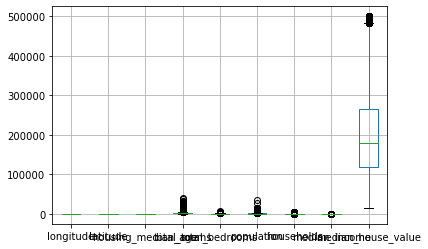

In [8]:
df.boxplot()

In [9]:
thresold = len(df)*0.1
thresold

df.dropna(thresh=thresold, axis=1, inplace=True)  #axis = 1 for column axis = 0 for row
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
def impute_values(series):
    return series.fillna(series.median())

In [11]:
df.total_bedrooms = df['total_bedrooms'].transform(impute_values)

<AxesSubplot:>

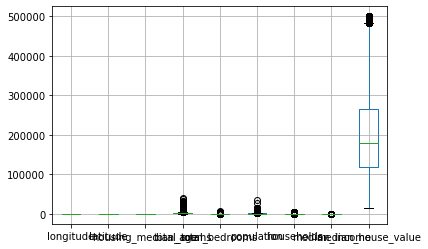

In [12]:
df.boxplot()


In [13]:
grp = df.groupby('median_house_value')
x = grp['housing_median_age'].agg(np.mean)
y = grp['total_rooms'].agg(np.mean)
z = grp['total_bedrooms'].agg(np.mean)

print(x)
print(y)
print(z)

median_house_value
14999.0     30.750000
17500.0     39.000000
22500.0     36.250000
25000.0     21.000000
26600.0     34.000000
              ...    
498800.0    29.000000
499000.0    18.000000
499100.0    28.000000
500000.0    38.000000
500001.0    33.802073
Name: housing_median_age, Length: 3842, dtype: float64
median_house_value
14999.0      443.750000
17500.0      493.000000
22500.0     2805.750000
25000.0       44.000000
26600.0     1440.000000
               ...     
498800.0    1945.000000
499000.0    4845.000000
499100.0    2024.000000
500000.0    2202.037037
500001.0    2961.968912
Name: total_rooms, Length: 3842, dtype: float64
median_house_value
14999.0     151.750000
17500.0     168.000000
22500.0     586.500000
25000.0      33.000000
26600.0     309.000000
               ...    
498800.0    269.000000
499000.0    735.000000
499100.0    297.000000
500000.0    539.592593
500001.0    501.298446
Name: total_bedrooms, Length: 3842, dtype: float64


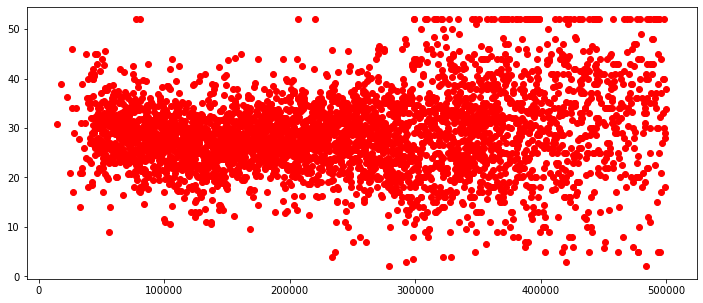

In [16]:
plt.figure(figsize=(12,5))
plt.plot(x, 'ro')

In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
grp = df.groupby('ocean_proximity')
x = grp['housing_median_age'].agg(np.mean)
y = grp['median_house_value'].agg(np.mean)

print(x)
print(y)

ocean_proximity
<1H OCEAN     29.279225
INLAND        24.271867
ISLAND        42.400000
NEAR BAY      37.730131
NEAR OCEAN    29.347254
Name: housing_median_age, dtype: float64
ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64


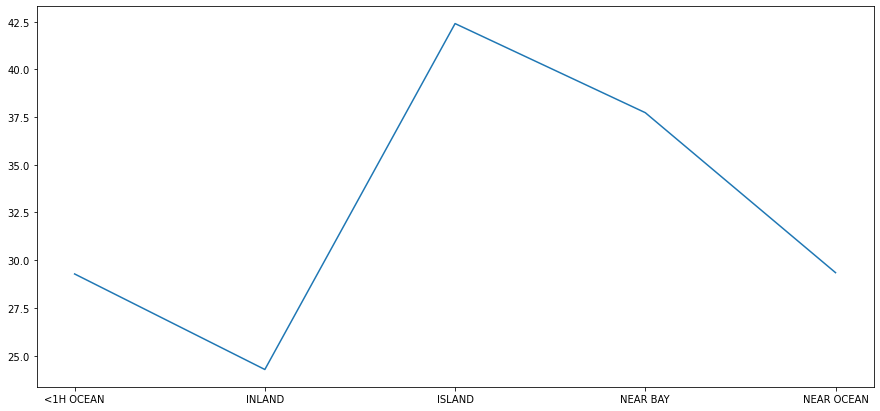

In [24]:
plt.figure(figsize=(15,7))
plt.plot(x)

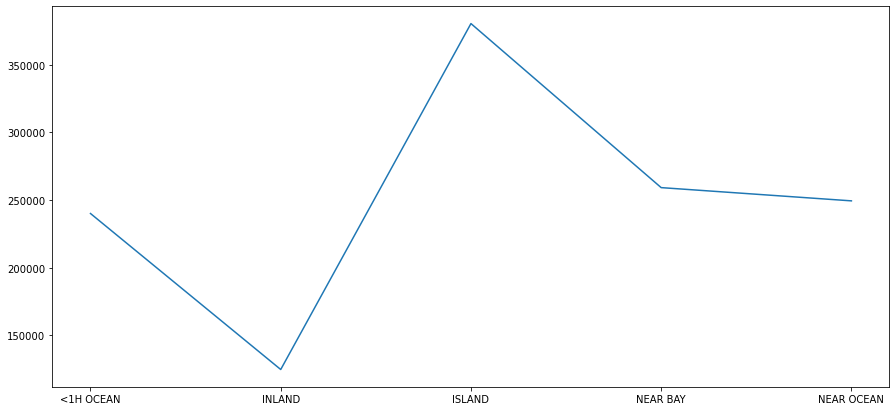

In [25]:
plt.figure(figsize=(15,7))
plt.plot(y)

In [27]:
grp = df.groupby('ocean_proximity')
x = grp['total_rooms'].agg(np.mean)
y = grp['population'].agg(np.mean)
print(x)
print(y)

ocean_proximity
<1H OCEAN     2628.343586
INLAND        2717.742787
ISLAND        1574.600000
NEAR BAY      2493.589520
NEAR OCEAN    2583.700903
Name: total_rooms, dtype: float64
ocean_proximity
<1H OCEAN     1520.290499
INLAND        1391.046252
ISLAND         668.000000
NEAR BAY      1230.317467
NEAR OCEAN    1354.008653
Name: population, dtype: float64


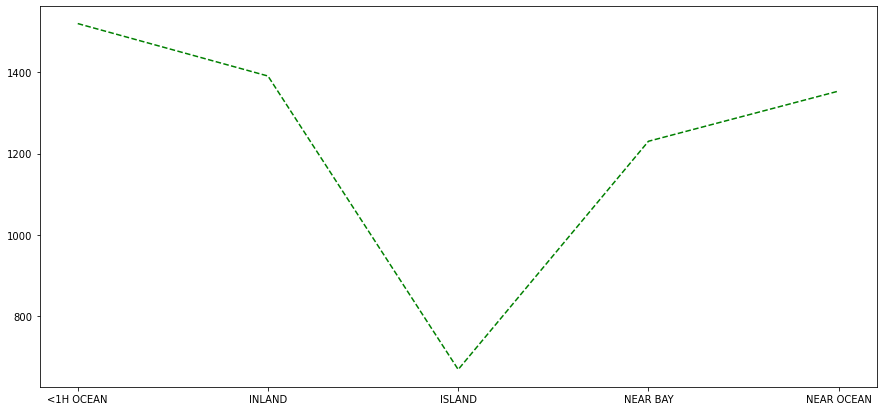

In [31]:
plt.figure(figsize=(15,7))
plt.plot(y, 'g--')